In [191]:
import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv
import matplotlib.pyplot as plt

In [192]:
env = GridworldEnv()

In [266]:
def policy_eval(policy, env, V, discount_factor=1.0, theta=0.00001, converge=True):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a random (all 0) value function
    while True:
        delta = 0
        # For each state, perform a "full backup"
        for s in range(env.nS):
            v = 0
            # Look at the possible next actions
            for a, a_prob in enumerate(policy[s]):
                # For each action, look at the possible next states...
                for prob, next_state, reward, _ in env.P[s][a]:
                    # Calculate the expected value. Ref: Sutton book eq. 4.6.
                    v += a_prob * prob * (reward + discount_factor * V[next_state])
                    # notice V[next_state] uses the old(given) value for s'
            # How much our value function changed (across any states)
            delta = max(delta, np.abs(v-V[s])) # only update delta when .abs is smaller
            print(delta)
            V[s] = v
            
        if not converge: # when we want single iteration
            break
        
        if delta < theta: # when converged
            break
            
    return np.array(V)

In [270]:
random_policy = np.ones([env.nS, env.nA]) / env.nA #(16,4)
v = np.zeros(env.nS)
value_list = []

#### Manual iteration for 10 times
Notice the delta values are meaningless here; they don't decrease as it resets at the beginning of every iteration

In [271]:
for i in range(10):
    v = policy_eval(random_policy, env, v, converge=False) #(16,)
    value_list.append(v)

0
1.0
1.25
1.3125
1.3125
1.5
1.6875
1.75
1.75
1.75
1.84375
1.8984375
1.8984375
1.8984375
1.8984375
1.8984375
0
0.9375
1.296875
1.41796875
1.41796875
1.41796875
1.55078125
1.654296875
1.654296875
1.654296875
1.724609375
1.724609375
1.724609375
1.724609375
1.724609375
1.724609375
0
0.88671875
1.2880859375
1.444580078125
1.444580078125
1.444580078125
1.471435546875
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
0
0.848388671875
1.26312255859375
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
0
0.8178558349609375
1.2024650573730469
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.331707

#### Automatic Iteration until Convergence

In [274]:
v = np.zeros(env.nS)
v = policy_eval(random_policy, env, v, converge=True)

0
1.0
1.25
1.3125
1.3125
1.5
1.6875
1.75
1.75
1.75
1.84375
1.8984375
1.8984375
1.8984375
1.8984375
1.8984375
0
0.9375
1.296875
1.41796875
1.41796875
1.41796875
1.55078125
1.654296875
1.654296875
1.654296875
1.724609375
1.724609375
1.724609375
1.724609375
1.724609375
1.724609375
0
0.88671875
1.2880859375
1.444580078125
1.444580078125
1.444580078125
1.471435546875
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
1.472412109375
0
0.848388671875
1.26312255859375
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
1.4061737060546875
0
0.8178558349609375
1.2024650573730469
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.3317079544067383
1.331707

0.0002845125296566664
0.0002845125296566664
0.0002845125296566664
0.0002845125296566664
0.0002845125296566664
0.0002845125296566664
0.0002845125296566664
0.0002845125296566664
0
0.00016473127706362334
0.00023682325270968363
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0.000260667891183175
0
0.00015092535522498451
0.00021697539275677968
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0.0002388216419717537
0
0.00013827649038766765
0.00019879095707153738
0.00021880629951809283
0.00021880629951809283
0.00021880629951809283
0.00021880629951809283
0.00021880629951809283
0.0002

In [275]:
# Test: Make sure the evaluated policy is what we expected
expected_v = np.array([0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)

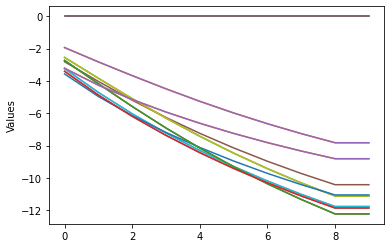

In [245]:
plt.plot(value_list[:][:])
plt.ylabel('Values')
plt.show()

---

### Keypoints

- Python's `enumerate()` lets you write Pythonic for loops when you need a **count** and the **value from an iterable**
- why are we +=ing equation to the v?
- what's the purpose of delta and theta? -> Testing convergence